# Week 05 (Introduction to Keras and TensorFlow)

Kembali ke [Sains Data](../sainsdata2023.qmd)

- TensorFlow: Python-based, free, open source machine learning platform developed by Google that enables manipulation of mathematical expressions over numerical tensors, computes gradients automatically, supports CPUs, GPUs, TPUs, allows easy distribution of computation across machines, and can be exported to other runtimes for easy deployment in practical settings.
- Keras: a deep learning API for Python, built on top of TensorFlow, known for its convenient model definition and training, initially developed for research with fast experimentation, and can run on various hardware types, including GPU, TPU, and CPU, and scale to multiple machines seamlessly while prioritizing developer experience.

![](images/week-05/tf-keras.png)

## prerequisites


In [27]:
# !pip install tensorflow # uncomment if you don't have tensorflow installed
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

##  All about Tensors and Tensorflow

In [2]:
# All-ones or all-zeros tensors

x = tf.ones(shape = (2,1)) # 2x3 matrix of ones, similar to np.ones((2,1))
print(x)

x = tf.zeros(shape = (2,1)) # 2x3 matrix of zeros, similar to np.zeros((2,1))
print(x)



tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
x.__class__

tensorflow.python.framework.ops.EagerTensor

In [41]:
# Random tensors

# create a tensor with random values from a normal distribution
x = tf.random.normal(shape = (2,3), mean = 0, stddev = 1)
print(x)

# create a tensor with random values from a uniform distribution
x = tf.random.uniform(shape = (2,3), minval = 0, maxval = 1)
print(x)

tf.Tensor(
[[ 0.63700163  1.8413717   0.12851602]
 [-1.0153099  -1.3446143   1.6644784 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0.838336   0.8172778  0.42057896]
 [0.21810079 0.07237494 0.9222772 ]], shape=(2, 3), dtype=float32)


In [7]:
# numpy array are assignable while tensors are not
x = np.random.normal(loc = 0, scale = 1, size = (2,3))
x[0,0] = 100
print(x)

[[ 1.00000000e+02 -1.25304057e+00 -1.18967720e+00]
 [ 4.74877369e-01 -8.13430401e-02 -4.57822064e-01]]


In [10]:
# numpy array are assignable while tensors are not
x = tf.ones(shape = (2,3))
x[0,0] = 100
print(x)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [14]:
# Creating a TensorFlow variable
v = tf.Variable(initial_value = tf.random.normal(shape = (2,3)))
print(v)
print()

v.assign(tf.zeros(shape = (2,3)))
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.10799041,  2.325188  , -0.20042379],
       [ 0.48759696,  0.53195345,  0.29525948]], dtype=float32)>

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


In [15]:
# Assigning a value to a subset of a TensorFlow variable
v[0,0].assign(100)
print(v)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,   0.,   0.],
       [  0.,   0.,   0.]], dtype=float32)>


In [17]:
# adding to the current value
v.assign_add(tf.ones(shape = (2,3)))
print(v)


<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[101.,   1.,   1.],
       [  1.,   1.,   1.]], dtype=float32)>


In [19]:
# just like numpy, TensorFlow offers a large collection of tensor operations to express
# mathematical formulas.
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t
do: retrieve the gradient of any differentiable expression with respect to any of its
inputs. Just open a GradientTape scope, apply some computation to one or several
input tensors, and retrieve the gradient of the result with respect to the inputs

In [20]:
# Using the GradientTape
input_var = tf.Variable(initial_value = 3.0)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
grad = tape.gradient(result, input_var)
print(grad)


tf.Tensor(6.0, shape=(), dtype=float32)


In [22]:
# Using GradientTape with constant tensor inputs
input_var = tf.constant(3.0)
with tf.GradientTape() as tape:
    tape.watch(input_var)
    result = tf.square(input_var)
grad = tape.gradient(result, input_var)
print(grad)

tf.Tensor(6.0, shape=(), dtype=float32)


In [24]:
# Using nested gradient tapes to compute second-order gradients
time = tf.Variable(0.0)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time) 
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)



tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## An end-to-end example: A linear classifier in pure TensorFlow


In [9]:
# Generating two classes of random points in a 2D plane
num_samples_per_class, num_classes = 1000, 2
negative_samples = np.random.multivariate_normal(mean = [0,3], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3,0], cov = [[1,0.5],[0.5,1]], size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'), np.ones((num_samples_per_class, 1), dtype = 'float32')))

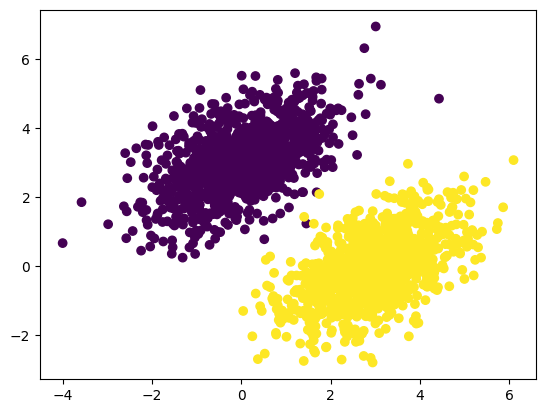

In [29]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [48]:
# Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.normal(shape = (input_dim, output_dim)))
b = tf.Variable(tf.random.normal(shape = (output_dim,)))



In [49]:
# the forward pass
def model(inputs):
    return tf.sigmoid(tf.matmul(inputs, W) + b)
    
# The mean squared error loss function

def entropy_loss(targets, predictions):
    per_sample_losses = - targets * tf.math.log(predictions) - (1 - targets) * tf.math.log(1 - predictions)
    return tf.reduce_mean(per_sample_losses)


# training step 
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
        W.assign_sub(learning_rate * grad_loss_wrt_W)
        b.assign_sub(learning_rate * grad_loss_wrt_b)
        return loss





In [53]:
# training loop/process/epoch
for step in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0495
Loss at step 1: 0.0473
Loss at step 2: 0.0454
Loss at step 3: 0.0436
Loss at step 4: 0.0420
Loss at step 5: 0.0406
Loss at step 6: 0.0392
Loss at step 7: 0.0380
Loss at step 8: 0.0369
Loss at step 9: 0.0358
Loss at step 10: 0.0348
Loss at step 11: 0.0339
Loss at step 12: 0.0330
Loss at step 13: 0.0322
Loss at step 14: 0.0315
Loss at step 15: 0.0308
Loss at step 16: 0.0301
Loss at step 17: 0.0295
Loss at step 18: 0.0289
Loss at step 19: 0.0283
Loss at step 20: 0.0278
Loss at step 21: 0.0273
Loss at step 22: 0.0268
Loss at step 23: 0.0263
Loss at step 24: 0.0259
Loss at step 25: 0.0255
Loss at step 26: 0.0251
Loss at step 27: 0.0247
Loss at step 28: 0.0243
Loss at step 29: 0.0240
Loss at step 30: 0.0236
Loss at step 31: 0.0233
Loss at step 32: 0.0230
Loss at step 33: 0.0227
Loss at step 34: 0.0224
Loss at step 35: 0.0221
Loss at step 36: 0.0218
Loss at step 37: 0.0215
Loss at step 38: 0.0213
Loss at step 39: 0.0210
Loss at step 40: 0.0208
Loss at step 41: 0.0205
Lo

tf.Tensor(
[[0.04117302]
 [0.02456259]
 [0.00931301]
 ...
 [0.9823857 ]
 [0.9144001 ]
 [0.98359877]], shape=(2000, 1), dtype=float32)


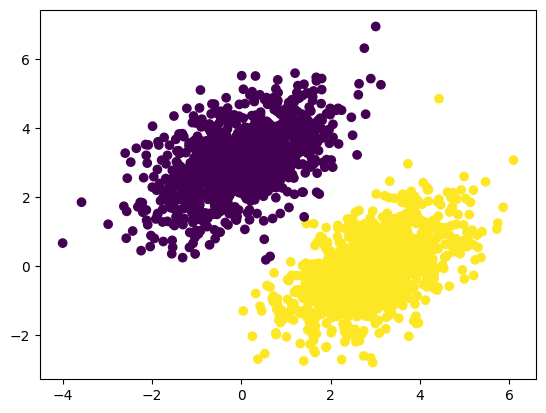

In [54]:
predictions = model(inputs)
print(predictions)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## Deep learning with Keras

So, the APIs that we will often use when building a neural network in Keras are `keras.layers` and `keras.models`.

Simply put, each `keras.layers` is responsible for data processing (taking input and producing output), while `keras.models` is the API for connecting one `keras.layers` to another.

In [12]:
# Using the Keras Sequential API to build a linear classifier
model = keras.Sequential([
    keras.layers.InputLayer(input_shape  = (2,)), # input layers (stateless layer)
    keras.layers.Dense(units = 10, activation = 'relu'), # FC  layer (stateful layer)
    keras.layers.Dense(units = 1, activation = 'sigmoid'), # FC layer (stateful layer)
])



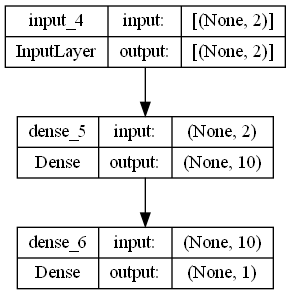

In [14]:
# plotting the model
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, rankdir = 'TB', expand_nested = False, dpi = 96)

Once the model architecture is defined, you still have to choose three more things:

- Loss function (objective function)—The quantity that will be minimized during training. It represents a measure of success for the task at hand
- Optimizer—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).
- Metrics—The measures of success you want to monitor during training and validation, such as classification accuracy. Unlike the loss, training will not optimize
directly for these metrics. As such, metrics don’t need to be differentiable.

Once you’ve picked your loss, optimizer, and metrics, you can use the built-in compile()
and fit() methods to start training your model. 


The compile() method configures the training process

In [18]:
# we can pass strings to the loss and metrics arguments
model.compile(optimizer="sgd",
              loss="sparse_binary_crossentropy",
              metrics=["accuracy"])

# or we can pass loss and metrics objects (both produce the same result)
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])


In [ ]:
# benefit of using objects is that we can configure them
# dont run this code

class my_custom_loss(keras.losses.Loss):
    pass

class my_custom_metric_1(keras.metrics.Metric):
    pass

class my_custom_metric_2(keras.metrics.Metric):
    pass 

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=my_custom_loss,
              metrics=[my_custom_metric_1, my_custom_metric_2]
)

The built-in loss functions and metrics can be found in keras.losses and keras.metrics documentation.

After `compile()`, the next method is `fit()`, which implements the training loop itself. The key arguments of `fit()` include the data to train on, which is typically passed as NumPy arrays or a TensorFlow Dataset object. The number of epochs to train for is also specified, indicating how many times the training loop should iterate over the passed data. Additionally, the batch size to use within each epoch of mini-batch gradient descent is specified, indicating the number of training examples considered to compute the gradients for one weight update step.

The `fit()` method returns a History object, which contains a record of the loss and metric values observed during training. This record is stored as a dictionary, with keys being the name of the metrics and values being a list of values recorded at each epoch.

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
x_train = inputs
y_train = targets
history = model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)


Epoch 1/3
25/25 [==============================] - 1s 17ms/step - loss: 0.1882 - accuracy: 0.9937 - val_loss: 0.2297 - val_accuracy: 0.9825
Epoch 2/3
25/25 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9956 - val_loss: 0.1806 - val_accuracy: 0.9875
Epoch 3/3
25/25 [==============================] - 0s 5ms/step - loss: 0.1119 - accuracy: 0.9969 - val_loss: 0.1423 - val_accuracy: 0.9875


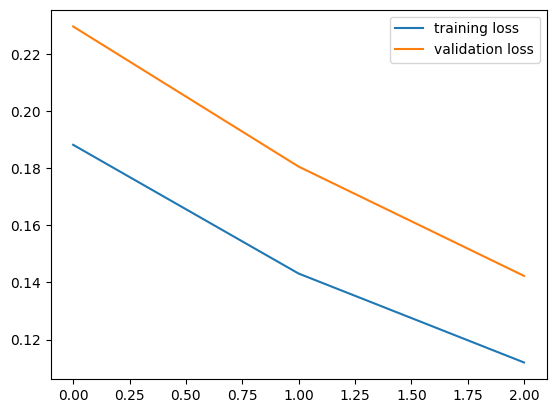

In [28]:
history.history

# plotting the loss and accuracy curves
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

## Inference: Using a model after training

instead of using model(new_data) to make predictions, we use model.predict(new_data) to make predictions on new data.


In [37]:
new_inputs = np.random.uniform(low = -1, high = 3, size = (256, 2))
predictions = model.predict(new_inputs, batch_size=128)

2/2 [==============================] - 0s 5ms/step


In [38]:
print(predictions)

[[0.08076628]
 [0.09871415]
 [0.461069  ]
 [0.1276516 ]
 [0.4253592 ]
 [0.11114225]
 [0.25637963]
 [0.6989103 ]
 [0.30173382]
 [0.9123289 ]
 [0.2240395 ]
 [0.86962867]
 [0.2930864 ]
 [0.7623196 ]
 [0.8919245 ]
 [0.85015684]
 [0.9198693 ]
 [0.3118358 ]
 [0.29436693]
 [0.41225567]
 [0.62281114]
 [0.20957854]
 [0.2546269 ]
 [0.14533882]
 [0.39954668]
 [0.72597396]
 [0.72029203]
 [0.14848693]
 [0.89544886]
 [0.23350693]
 [0.13677543]
 [0.6027528 ]
 [0.04975716]
 [0.62043774]
 [0.12495781]
 [0.41638136]
 [0.40849304]
 [0.75599575]
 [0.10711117]
 [0.7210298 ]
 [0.16202773]
 [0.58192235]
 [0.08633437]
 [0.652066  ]
 [0.2231856 ]
 [0.24822547]
 [0.12730986]
 [0.29572365]
 [0.49881336]
 [0.26938245]
 [0.38568485]
 [0.541473  ]
 [0.36511543]
 [0.8816863 ]
 [0.19856545]
 [0.16809542]
 [0.6914996 ]
 [0.8430513 ]
 [0.63214254]
 [0.58684945]
 [0.39648739]
 [0.53129727]
 [0.28006184]
 [0.08559055]
 [0.59670126]
 [0.59945154]
 [0.14749527]
 [0.06490649]
 [0.8320455 ]
 [0.05914058]
 [0.3041497 ]
 [0.09

In [39]:
# check the shape of the predictions
print(predictions.shape)

(256, 1)


In [40]:
# get class predictions
predictions_class = np.round(predictions)
print(predictions_class)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.

## Additional Notes

For those interested in learning more about TensorFlow and Keras, I personally believe that the documentation available on the web is good enough. However, if you prefer reading a book, I recommend "Deep Learning with Python" by Francois Chollet, the creator of Keras. This book essentially summarizes the content of the documentation in a more cohesive and structured manner.

## References
- Chollet, F. (2021). Deep Learning with Python. Manning Publications.
- TensorFlow. (n.d.). Retrieved from https://www.tensorflow.org/
- Keras. (n.d.). Retrieved from https://keras.io/